## Naive Bayes Nedir?

Naive Bayes temeli bayes teoremine dayanan bir sınıflandırma algoritmasıdır. Naive Bayes sınıflandırması olasılık ilkelerine göre tanımlanmış bir dizi hesaplama ile, sisteme sunulan verilerin sınıfını yani kategorisini tespit etmeyi amaçlar. Lazy (tembel) bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır. Az bir eğitim verisiyle çok başarılı işler çıkartabilir. 

Naive Bayes sınıflandırmasında sisteme belirli bir oranda öğretilmiş veri sunulur. Öğretim için sunulan verilerin mutlaka bir sınıfı bulunmalıdır. Öğretilmiş veriler üzerinde yapılan olasılık işlemleri ile, sisteme sunulan yeni test verileri, daha önce elde edilmiş olasılık değerlerine göre işletvilir ve verilen test verisinin hangi kategoride olduğu tespit edilmeye çalışılır. Elbette öğretilmiş veri sayısı ne kadar çok ise, test verisinin gerçek kategorisini tespit etmek o kadar kesin olabilmektedir.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/naive_bayes/naivebayes.png?raw=true" width="400">

P(A|B) = B’nin doğru olduğu bilindiğinde A’nın olma olasılığı

P(B|A) = A’nın doğru olduğu bilindiğinde B’nin olma olasılığı

P(A) = A’nın olma olasılığı

P(B) = B’nin olma olasılığı

##### Örnek bir bayes hesaplaması
Hava durumuna göre futbol oynanabilme durumu hesaplanıyor.
<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/naive_bayes/veri_bayesian_01.jpg?raw=true" width="150">

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/naive_bayes/veri_bayesian_02_.jpg?raw=true" width="450">


- Beklenti 1: Güneşliyken Futbol Oyna Evet = P(Evet | Güneşli) = P(Güneşli | Evet) * P(Evet) / P (Güneşli)
P (Güneşli |Evet) = 3/9 = 0.333, P(Güneşli) = 5/14 = 0.357, P(Evet)= 9/14 = 0.643
P (Evet | Güneşli) = 0.333 * 0.643 / 0.357 = 0.600

- Beklenti 2: Güneşliyken Futbol Oyna Hayır = P(Hayır | Güneşli) = P(Güneşli | Hayır) * P(Hayır) / P (Güneşli)
P (Güneşli | Hayır) = 2/9 = 0.222, P(Güneşli) = 5/14 = 0.357, P(Hayır)= 5/14 = 0.357
P (Hayır | Güneşli) = 0.222 * 0.357 / 0.357 = 0.222

Son aşamada beklenti 1 ile beklenti 2 kıyaslanır. Beklenti 1 daha büyük değere sahip olduğu için seçilir. Naive Bayes havayı güneşli gördüğünde futbol oynamaya izin verir.

## Naive Bayes Örnek Uygulama
Bu uygulamada sosyal medyada kullanıcıların reklamını gördükleri bir ürünü alıp almadıklarının kaydını içeren bir veri seti ile naive bayes kullanılarak sınıflandırma yapılıyor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/azsaritas/makine_ogrenmesi/main/dosyalar/naive_bayes/SosyalMedyaReklamKampanyasi.csv')

##### Gerekli kütüphaneleri ve veri setini import ediyoruz.
#### Veri setinde KullaniciID, Cinsiyet, Yaş, TahminiMaas, SatinAldiMi gibi verilerimiz var. Hedef değişken SatinAldiMi’dir. Diğer dört nitelik ise bağımsız niteliklerdir. Bu bağımsız niteliklerle bağımlı nitelik (satın alma davranışının gerçekleşip gerçekleşmeyeceği) tahmin edilecek.

In [2]:
dataset.head(8)

,KullaniciID,Cinsiyet,Yas,TahminiMaas,SatinAldiMi
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadın,26,43000,0
3,15603246,Kadın,27,57000,0
4,15804002,Erkek,19,76000,0
5,15728773,Erkek,27,58000,0
6,15598044,Kadın,27,84000,0
7,15694829,Kadın,32,150000,1


#### Veri setini bağımlı ve bağımsız değişkenlere ayırıyoruz.

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

#### Veri setini eğitim ve test kümesi olarak parçalıyoruz.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Birimleri aynı hale getirmek için normalizasyon uyguluyoruz.

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Naive Bayes oluşturuyoruz ve eğitiyoruz.

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Test setimizi kullanarak tahmin yapıyoruz.

In [7]:
y_pred = classifier.predict(X_test)

#### Hata matrisi oluşturuyoruz.

In [8]:
from sklearn.metrics import confusion_matrix
from numpy import array
cm = confusion_matrix(y_test, y_pred)
cm 


array([[65,  3],
       [ 7, 25]], dtype=int64)

#### Burada 3+7= 10 adet hatalı sınıflandırma olduğu görülüyör.
#### Test setimizin grafiğini çizdiriyoruz.

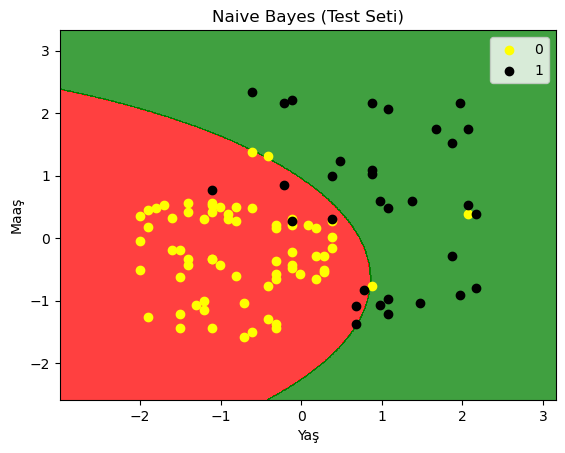

In [9]:
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('Yellow', 'Black'))(i), label = j)
plt.title('Naive Bayes (Test Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

#### Grafikte de görüldüğü gibi 7 adet kırmızı bölgede, 3 adet yeşil bölgede hatalı sınıflandırma var.